# Code for Experiment 3 - Maxwell Model

In [1]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np

## Data

In [6]:
U = 5 # V
R = 1000 # ohm

# Measurements
# f (Hz), U_0 (V), V_0 (V), T (ms), phi_Z (°)
data = np.array([
    [100000,4.8,4.6,0.01,-07.2],
    [10000,4.9,2.8,0.1,-47.3],
    [2000,5.0,0.8,0.5,-48.7],
    [1500,5.0,0.7,0.672,-42.8],
    [1000,5.0,0.6,1.0,-33.4],
    [500,5.1,0.5,2.0,-18.8],
    [100,5.1,0.5,10,-04.0],
    [50,5.1,0.5,20,-02.3]
])

f     = data[:,0] # in Hz
U_0   = data[:,1] # in V
V_0   = data[:,2] # in V
T     = data[:,3] # in ms
T     = [element * 10 ** -3 for element in T]  # convert to s
phi_Z = data[:,4] # in °


## Data Analysis

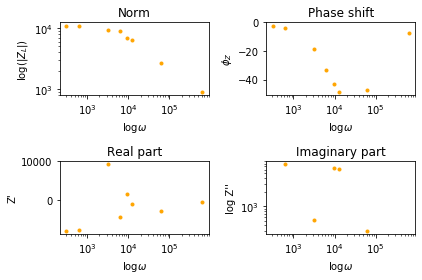

In [18]:
# Complex unit
i = 1j

# Calculate circular velocity
omega = [2 * np.pi * f for f in f]

# Function for calculating impedance
def calculateImpedance(U_0, V_0, phi_Z):
    Z_hat = (U_0 / V_0 * np.exp(i * phi_Z) - 1) * R
    return Z_hat

# Calculate impedance
Z_hat = [calculateImpedance(U_0, V_0, phi_Z) for U_0, V_0, phi_Z in zip(U_0, V_0, phi_Z)]
Z_hat_norm = [np.abs(z) for z in Z_hat] # get norm of Z_hat
Z_hat_real = [z.real for z in Z_hat]      # get real part of Z_hat
Z_hat_im = [z.imag for z in Z_hat]        # get imaginary part of Z_hat

# Plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].loglog(omega, Z_hat_norm, '.', color='orange')
axs[0, 0].set_title('Norm')
axs[0, 0].set_xlabel(r'$\log{\omega}$')
axs[0, 0].set_ylabel(r'$\log\left(|Z_L|\right)$')

axs[0, 1].semilogx(omega, phi_Z, '.', color='orange')
#axs[0, 1].axhline(y = np.pi/2, color = 'r', linestyle = '-', label=r'$\frac{\pi}{2}$')
axs[0, 1].set_title('Phase shift')
#axs[0, 1].set_ylim([0, 3])
axs[0, 1].set_ylabel('$\phi_Z$')
axs[0, 1].set_xlabel('$\log{\omega}$')
#axs[0, 1].legend(loc='upper right')

axs[1, 0].semilogx(omega, Z_hat_real, '.', color='orange')
axs[1, 0].set_title('Real part')
axs[1, 0].set_xlabel(r'$\log{\omega}$')
axs[1, 0].set_ylabel('Z\'')

axs[1, 1].loglog(omega, Z_hat_im, '.', color='orange')
axs[1, 1].set_title('Imaginary part')
axs[1, 1].set_xlabel(r'$\log{\omega}$')
axs[1, 1].set_ylabel('log Z\'\'')

plt.tight_layout()
#plt.rcParams["figure.figsize"]=10,10
plt.show()